In [3]:
%load_ext autoreload
%autoreload 2


In [4]:

import matplotlib.pyplot as plt
import numpy as np 
import netCDF4 as nc

from compare_f1_f2.results_compare import Facts1Results, Facts2Results, check_ice_sheet_projections
from compare_f1_f2.plotting import plot_f1_f2_diffs_for_icesheet

In [5]:
import xarray as xr
import os

def read_netcdf_files(data_dir):
    """
    Reads all NetCDF files in the specified directory and returns a dictionary of xarray Datasets.
    The keys are filenames, and the values are the loaded Datasets.
    """
    datasets = {}
    for fname in os.listdir(data_dir):
        if fname.endswith('.nc'):
            fpath = os.path.join(data_dir, fname)
            ds = xr.open_dataset(fpath)
            datasets[fname] = ds
    return datasets


In [55]:
f2_gslr_ssp585_path = '/Users/emmamarshall/Desktop/facts_work/facts_v2/fittedismip-gris/data/output/for_validation_ssp585/gris_gslr.nc' 
f2_lslr_ssp585_path = '/Users/emmamarshall/Desktop/facts_work/facts_v2/fittedismip-gris/data/output/for_validation_ssp585/gris_lslr.nc'
f2_climate_ssp585_path = '/Users/emmamarshall/Desktop/facts_work/facts_v2/fittedismip-gris/data/input/climate_fair_ssp585.nc'

f1_gslr_ssp585_path = '/Users/emmamarshall/Desktop/facts_work/facts_v1/facts/experiments/fittedismip.ssp585/output/fittedismip.ssp585.GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc'
f1_lslr_ssp585_path = '/Users/emmamarshall/Desktop/facts_work/facts_v1/facts/experiments/fittedismip.ssp585/output/fittedismip.ssp585.GrIS1f.FittedISMIP.GrIS_GIS_localsl.nc'
f1_climate_ssp585_path = '/Users/emmamarshall/Desktop/facts_work/facts_v1/facts/experiments/fittedismip.ssp585/output/fittedismip.ssp585.temperature.fair.temperature_climate.nc'


In [66]:
scenario_ls = ['ssp585','ssp245','ssp126']

icesheets_ls = ['gris']


def read_facts1_results(scenario):
    
    facts1_base_path = f'/Users/emmamarshall/Desktop/facts_work/facts_v1/facts/experiments/fittedismip.{scenario}/output/' 
    facts1_gslr_base_fname = f'fittedismip.{scenario}.GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc' 
    facts1_lslr_base_fname = f'fittedismip.{scenario}.GrIS1f.FittedISMIP.GrIS_GIS_localsl.nc'
    facts1_climate_base_fname = f'fittedismip.{scenario}.temperature.fair.temperature_climate.nc'

    facts1_gslr_path = os.path.join(facts1_base_path, facts1_gslr_base_fname)
    facts1_lslr_path = os.path.join(facts1_base_path, facts1_lslr_base_fname)
    facts1_climate_path = os.path.join(facts1_base_path, facts1_climate_base_fname)

    facts1_gslr_ds = xr.open_dataset(facts1_gslr_path)
    facts1_lslr_ds = xr.open_dataset(facts1_lslr_path)
    facts1_climate_ds = xr.open_dataset(facts1_climate_path, group = scenario)

    out_dict = {
        'gslr': facts1_gslr_ds,
        'lslr': facts1_lslr_ds,
        'climate': facts1_climate_ds
    }
    return out_dict

def read_facts2_results(scenario):
    
    facts2_base_path = f'/Users/emmamarshall/Desktop/facts_work/facts_v2/fittedismip-gris/data/output/for_validation_{scenario}/' 
    facts2_fair_base_path = '/Users/emmamarshall/Desktop/facts_work/facts_v2/fittedismip-gris/data/input/'
    facts2_gslr_base_fname = 'gris_gslr.nc' 
    facts2_lslr_base_fname = 'gris_lslr.nc'
    facts2_climate_base_fname = f'climate_fair_{scenario}.nc'

    facts2_gslr_path = os.path.join(facts2_base_path, facts2_gslr_base_fname)
    facts2_lslr_path = os.path.join(facts2_base_path, facts2_lslr_base_fname)
    facts2_climate_path = os.path.join(facts2_fair_base_path, facts2_climate_base_fname)

    facts2_gslr_ds = xr.open_dataset(facts2_gslr_path)
    facts2_lslr_ds = xr.open_dataset(facts2_lslr_path)
    facts2_climate_ds = xr.open_dataset(facts2_climate_path)

    out_dict = {
        'gslr': facts2_gslr_ds,
        'lslr': facts2_lslr_ds,
        'climate': facts2_climate_ds
    }
    return out_dict

def compare_results(scenario):
    f1_results = read_facts1_results(scenario)
    f2_results = read_facts2_results(scenario)

    for k in ['lslr','gslr']:
        print(f"Checking {k} results...")
        xr.testing.assert_allclose(f1_results[k]['sea_level_change'], f2_results[k]['sea_level_change']), f"{k} results do not match!" 
        print('All good!')

    return {'f1_results': f1_results,
            'f2_results': f2_results}

In [74]:
scenario_ls = ['ssp585','ssp245','ssp126']

for scenario in scenario_ls:
    print(f"Comparing results for scenario: {scenario}")
    compare_results(scenario)
    print("\n")

Comparing results for scenario: ssp585
Checking lslr results...
All good!
Checking gslr results...
All good!


Comparing results for scenario: ssp245
Checking lslr results...
All good!
Checking gslr results...
All good!


Comparing results for scenario: ssp126
Checking lslr results...
All good!
Checking gslr results...
All good!




In [70]:
ssp126_results = compare_results('ssp126')

Checking lslr results...
All good!
Checking gslr results...
All good!


In [73]:
xr.testing.assert_allclose(ssp126_results['f2_results']['gslr']['sea_level_change'],
                            ssp126_results['f1_results']['gslr']['sea_level_change'])

In [21]:
ssp585_facts1_results = read_facts1_results('ssp585')
ssp585_facts2_results = read_facts2_results('ssp585')

for k in ['lslr','gslr']:
    print(f"Checking {k} results...")
    xr.testing.assert_allclose(ssp585_facts1_results[k]['sea_level_change'], ssp585_facts2_results[k]['sea_level_change']), f"{k} results do not match!" 
    print('All good!')

In [50]:
for k in ['lslr','gslr']:
    print(f"Checking {k} results...")
    xr.testing.assert_allclose(ssp585_facts1_results[k]['sea_level_change'], ssp585_facts2_results[k]['sea_level_change']), f"{k} results do not match!" 
    print('All good!')

Checking lslr results...
All good!
Checking gslr results...
All good!


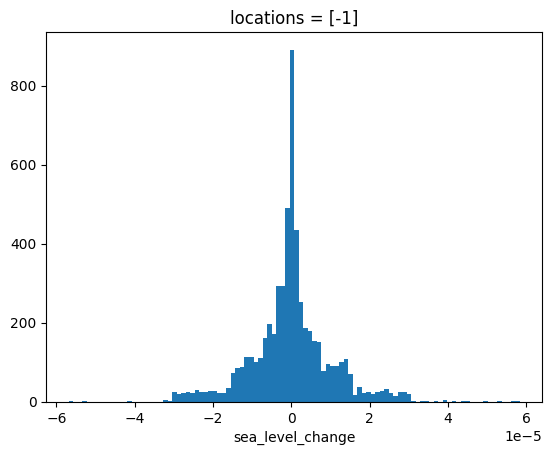

In [42]:
(ssp585_facts2_results['gslr']['sea_level_change']-ssp585_facts1_results['gslr']['sea_level_change']).plot.hist(bins=100);

In [40]:
(ssp585_facts2_results['gslr']['sea_level_change']-ssp585_facts1_results['gslr']['sea_level_change']).max()

<xarray.DataArray 'sea_level_change' ()> Size: 8B
array(5.83185299e-05)

In [31]:
xr.testing.assert_allclose(ssp585_facts1_results['gslr']['sea_level_change'],
                            ssp585_facts2_results['gslr']['sea_level_change'], rtol=1e-5, atol=1e-8)

In [33]:
f2_gslr_nc = nc.Dataset(f2_gslr_path)
f2_lslr_nc = nc.Dataset(f2_lslr_path)
f2_fair_nc = nc.Dataset(f2_climate_path, group = '/ssp585/surface_temperature')

f1_gslr_nc = nc.Dataset(f1_gslr_path)
f1_lslr_nc = nc.Dataset(f1_lslr_path)
f1_fair_nc = nc.Dataset(f1_climate_path, group='/ssp585')

In [15]:
f2_gslr_ssp585_ds = xr.open_dataset(f2_gslr_ssp585_path)
f2_lslr_ssp585_ds = xr.open_dataset(f2_lslr_ssp585_path)
f2_fair_ssp585_ds = xr.open_dataset(f2_climate_ssp585_path, group='ssp585') 

f1_gslr_ssp585_ds = xr.open_dataset(f1_gslr_ssp585_path)
f1_lslr_ssp585_ds = xr.open_dataset(f1_lslr_ssp585_path)
f1_fair_ssp585_ds = xr.open_dataset(f1_climate_ssp585_path, group='ssp585')

In [16]:
f1_fair_ssp585_ds['surface_temperature'].equals(f2_fair_ssp585_ds['surface_temperature'])

True

Do global slr projectsion match?

In [9]:
xr.testing.assert_allclose(f2_gslr_ssp585_ds['sea_level_change'],
                    f1_gslr_ssp585_ds['sea_level_change'])

In [17]:
f2_gslr_ssp585_ds['sea_level_change'].equals(f1_gslr_ssp585_ds['sea_level_change'])

False

Do local slr projections match?

In [11]:
xr.testing.assert_allclose(f2_lslr_ssp585_ds['sea_level_change'],
                    f1_lslr_ssp585_ds['sea_level_change'])

In [18]:
f2_lslr_ssp585_ds['sea_level_change'].equals(f1_lslr_ssp585_ds['sea_level_change'])

False